## 🔧 How to Run This Notebook

1. **Create a virtual environment (Python 3.12):**
   ```bash
   python -m venv .venv
   .venv\Scripts\activate        # Windows
   # source .venv/bin/activate   # macOS/Linux
2. **Import required pacakages**
3. **Install requirements File**
4. **Load dataset**
5. **Quick data check**
Shape, Missing values, Correlations 
6. **Proceeed to Data Cleaning**


In [2]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

print("Kernel is working with regression-venv!")





Kernel is working with regression-venv!


In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Load dataset
df = pd.read_csv(r"C:\Users\aduplooy\OneDrive - Ninety One\Documents\GitHub\2401PTDS_Regression_Project_ADP\co2_emissions_from_agri.csv")
# Quick check
print(df.shape)
df.head()

(6965, 31)


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [ ]:
# Check for missing values
df.isnull().sum()


Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [13]:
# Check for missing values %s 
(df.isnull().sum() / len(df)) * 100


Area                                0.000000
Year                                0.000000
Savanna fires                       0.445083
Forest fires                        1.335248
Crop Residues                      19.942570
Rice Cultivation                    0.000000
Drained organic soils (CO2)         0.000000
Pesticides Manufacturing            0.000000
Food Transport                      0.000000
Forestland                          7.078248
Net Forest conversion               7.078248
Food Household Consumption          6.791098
Food Retail                         0.000000
On-farm Electricity Use             0.000000
Food Packaging                      0.000000
Agrifood Systems Waste Disposal     0.000000
Food Processing                     0.000000
Fertilizers Manufacturing           0.000000
IPPU                               10.667624
Manure applied to Soils            13.323762
Manure left on Pasture              0.000000
Manure Management                  13.323762
Fires in o

Average Temperature °C             1.000000
Year                               0.545932
Food Transport                     0.075724
Food Retail                        0.073404
IPPU                               0.062616
Food Household Consumption         0.055263
Food Processing                    0.053083
Manure applied to Soils            0.044167
On-farm energy use                 0.041692
Fertilizers Manufacturing          0.041462
Food Packaging                     0.040767
Urban population                   0.036263
Manure Management                  0.033937
Drained organic soils (CO2)        0.029030
Pesticides Manufacturing           0.027960
Crop Residues                      0.019434
total_emission                     0.019043
On-farm Electricity Use            0.009081
Agrifood Systems Waste Disposal    0.008995
Total Population - Female          0.005456
Total Population - Male            0.003623
Manure left on Pasture            -0.015928
Rural population                

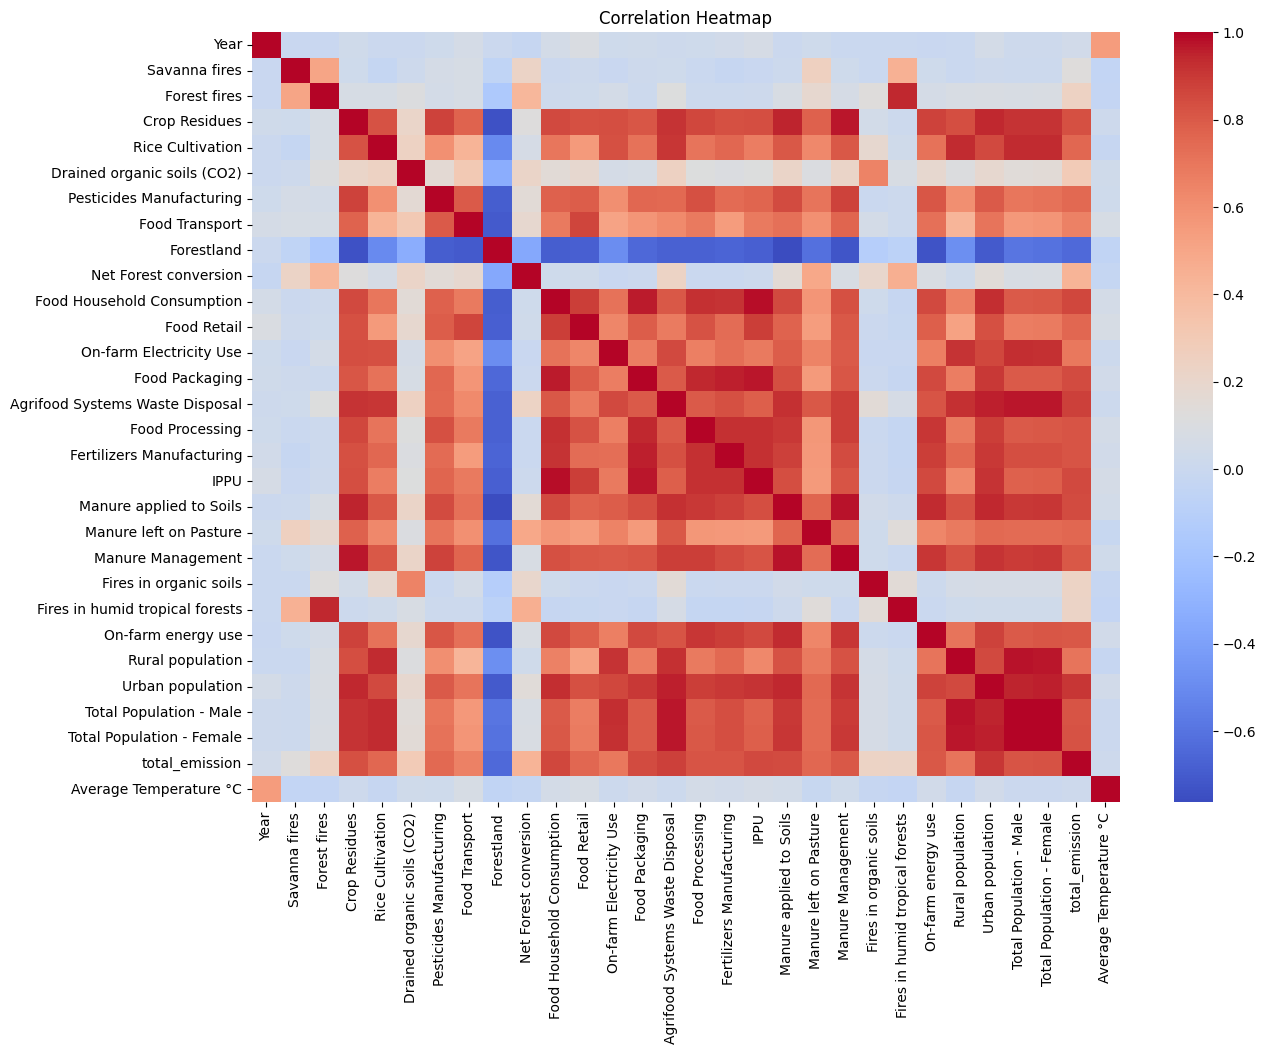

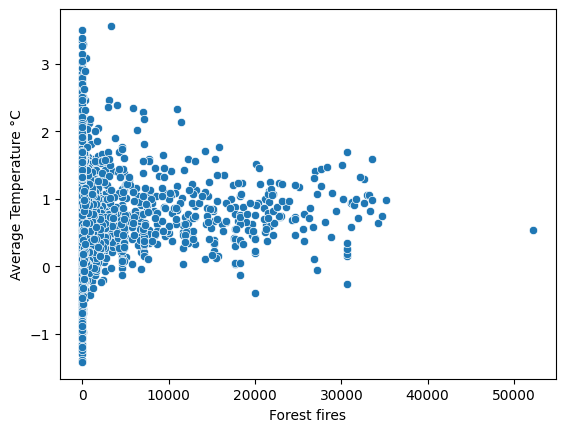

In [16]:
# Check correlations
corr = df.corr(numeric_only=True)
target_corr = corr['Average Temperature °C'].sort_values(ascending=False)
print(target_corr)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

sns.scatterplot(data=df, x='Forest fires', y='Average Temperature °C')
plt.show()



**Correlation Intepretations**
Key Takeaways from Correlation Results

Strong correlation: Year (0.55) → very strong, makes sense (temperature rising over time).

Weak but positive correlations (~0.05–0.08):

Food Transport, Food Retail, IPPU, Food Household Consumption, Food Processing, Manure applied to Soils, On-farm energy use, etc.

These are candidates to keep, but their predictive power might be limited.

Very weak correlations (<0.03 absolute):

Crop Residues, total_emission, On-farm Electricity Use, Agrifood Systems Waste Disposal, Population fields, Manure left on Pasture.

These add little predictive power. If they also have missingness → drop.

Negative correlations:

Net Forest conversion, Fires in humid tropical forests, Forest fires, Savanna fires, Forestland (all between -0.03 and -0.05).

Weak negatives; unlikely to add value.

**Missing value analysis for imputation**

If <5% missing → fill with median/mean (for numeric), or mode (for categorical).

If >30% missing → consider dropping that column, unless it’s critical.

For population / emissions-related variables, median imputation usually works better than mean (less sensitive to outliers).

***Columns With Negligible Missingness (<5%)***

Savanna fires (0.44%)
Forest fires (1.34%)
Fires in humid tropical forests (2.22%)

Action: Safe to impute with median (numeric values, often skewed).

***Columns With Moderate Missingness (5–15%)***

Forestland (7.08%)
Net Forest conversion (7.08%)
Food Household Consumption (6.79%)
IPPU (10.7%)
Manure applied to Soils (13.3%)
Manure Management (13.3%)
On-farm energy use (13.7%)

Action: If these variables are important for your regression → impute with median.
If not strongly related to your target (Average Temperature °C), you can consider dropping one or two to simplify

***Columns With High Missingness (>15%)***

Crop Residues (19.9%)

Action:If it’s strongly correlated with target → impute with median. Otherwise, document dropping it (20% missing is high).

## 🔹 Data Cleaning: Missing Values & Feature Selection

### 1. Missing Value Analysis
We examined the percentage of missing values per feature. Results showed:
- Several variables with **negligible missingness (<5%)** such as *Savanna fires*, *Forest fires*, and *Fires in humid tropical forests*.  
- A few variables with **moderate missingness (5–15%)**, including *Food Household Consumption* (~7%), *IPPU* (~11%), and *Manure applied to Soils* (~13%).  
- One variable with **high missingness (~20%)**: *Crop Residues*.  

### 2. Correlation with Target Variable
We computed correlations against our target (**Average Temperature °C**):
- **Strong correlation**: *Year* (r ≈ 0.55).  
- **Weak positive correlation (~0.05–0.08)**: *Food Transport*, *Food Retail*, *Food Household Consumption*, *Food Processing*, *IPPU*, *On-farm energy use*.  
- **Very weak/near zero correlation (<0.03 absolute)**: *Crop Residues*, *total_emission*, *On-farm Electricity Use*, *Population fields*.  
- **Weak negative correlation (~-0.03 to -0.05)**: *Forestland*, *Net Forest conversion*, *Forest fires*, *Savanna fires*.  

### 3. Cleaning Decisions
- **Dropped**:  
  - *Crop Residues* → high missingness (≈20%) + very weak correlation.  
  - *Manure Management* & *Forestland* & *Net Forest conversion* → moderate missingness + weak/negative correlation.  
  - Fire-related variables (*Forest fires*, *Savanna fires*, *Fires in humid tropical forests*) → low correlation and limited predictive power.  

- **Kept (with median imputation if missing)**:  
  - *Year* (strong correlation).  
  - *Food Transport*, *Food Retail*, *Food Household Consumption*, *Food Processing*, *IPPU*, *On-farm energy use* (moderate correlation, reasonable missingness).  

### 4. Next Steps
- Apply **median imputation** to remaining features with missing values (<15%).  
- Re-run summary statistics to confirm dataset completeness.  
- Proceed to **Exploratory Data Analysis (EDA)** with the cleaned dataset.  


In [ ]:
# Drop columns with low correlation / predictive power
drop_cols = [
    'Crop Residues',
    'Manure Management',
    'Forestland',
    'Net Forest conversion',
    'Forest fires',
    'Savanna fires',
    'Fires in humid tropical forests'
]
df = df.drop(columns=drop_cols)


In [18]:
# Median Imputation for Remaining Features
# Identify numeric columns with missing values
missing_cols = df.columns[df.isnull().any()]

# Apply median imputation
for col in missing_cols:
    df[col] = df[col].fillna(df[col].median())


In [19]:
# Verify No Missing Values Remain
df.isnull().sum().sort_values(ascending=False).head(10)


Area                           0
Year                           0
Rice Cultivation               0
Drained organic soils (CO2)    0
Pesticides Manufacturing       0
Food Transport                 0
Food Household Consumption     0
Food Retail                    0
On-farm Electricity Use        0
Food Packaging                 0
dtype: int64

In [22]:
# Save the Cleaned Dataset
df.to_csv("co2_emissions_from_agri_clean.csv", index=False)




# 🔍 Exploratory Data Analysis (EDA)

In this section, we explore the cleaned dataset to understand distributions, relationships, and correlations between features and our target variable **Average Temperature °C**.

---

## 1. Summary Statistics
We begin by reviewing basic statistics for all numeric variables.


In [27]:
# Summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Food Household Consumption,6965.0,4.528935e+03,2.492591e+04,0.000000,13.797400,1.554711e+02,1.238669e+03,4.662882e+05
Food Retail,6965.0,2.043211e+03,8.494249e+03,0.000000,26.818500,1.720426e+02,1.075999e+03,1.337841e+05
On-farm Electricity Use,6965.0,1.626681e+03,9.343182e+03,0.000000,8.037600,2.912070e+01,4.999447e+02,1.656763e+05
Food Packaging,6965.0,1.658630e+03,1.148134e+04,0.000000,67.631366,7.401813e+01,2.817910e+02,1.757413e+05
Agrifood Systems Waste Disposal,6965.0,6.018445e+03,2.215674e+04,0.340000,86.680500,9.012757e+02,3.006442e+03,2.132897e+05


## 2. Missing Values Check
Confirm that our cleaning and imputation steps were successful.


In [28]:
df.isnull().sum().sort_values(ascending=False).head(10)


Area                           0
Year                           0
Rice Cultivation               0
Drained organic soils (CO2)    0
Pesticides Manufacturing       0
Food Transport                 0
Food Household Consumption     0
Food Retail                    0
On-farm Electricity Use        0
Food Packaging                 0
dtype: int64

## 3. Feature Distributions
We examine the distributions of numeric variables to detect skewness, outliers, and data ranges.


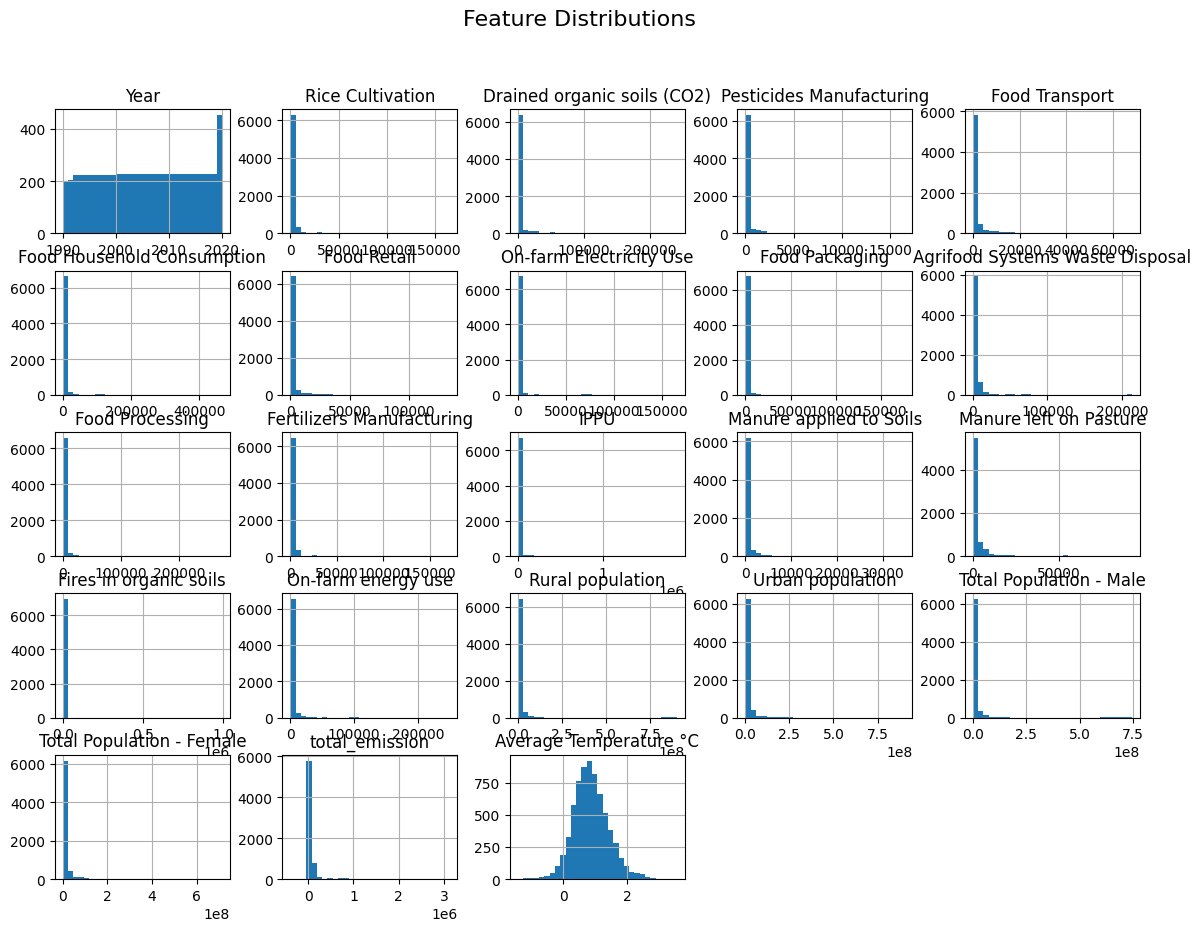

In [29]:
import matplotlib.pyplot as plt

df.hist(figsize=(14,10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


## 4. Correlation Analysis
We investigate how features correlate with each other and with the target variable (**Average Temperature °C**).


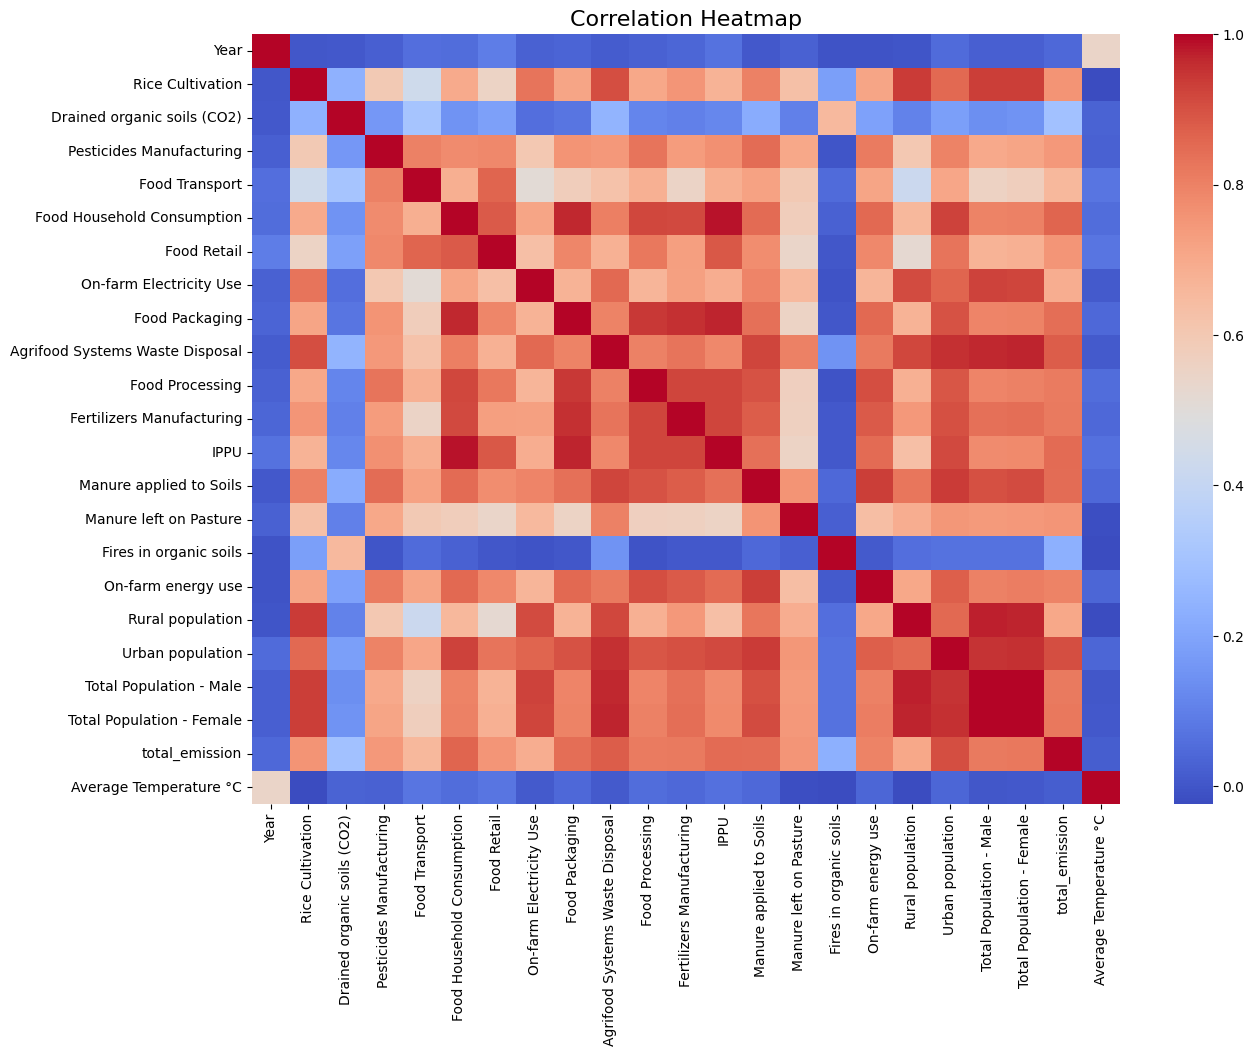

Average Temperature °C             1.000000
Year                               0.545932
Food Transport                     0.075724
Food Retail                        0.073404
IPPU                               0.062307
Food Household Consumption         0.055542
Food Processing                    0.053083
Manure applied to Soils            0.042268
Fertilizers Manufacturing          0.041462
Food Packaging                     0.040767
On-farm energy use                 0.039016
Urban population                   0.036263
Drained organic soils (CO2)        0.029030
Pesticides Manufacturing           0.027960
total_emission                     0.019043
On-farm Electricity Use            0.009081
Agrifood Systems Waste Disposal    0.008995
Total Population - Female          0.005456
Total Population - Male            0.003623
Manure left on Pasture            -0.015928
Rural population                  -0.019764
Rice Cultivation                  -0.022532
Fires in organic soils          

In [30]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Print correlation with target
df.corr(numeric_only=True)['Average Temperature °C'].sort_values(ascending=False)


## 5. Relationships with Target
We visualize scatterplots between selected features and the target to understand trends and linearity.


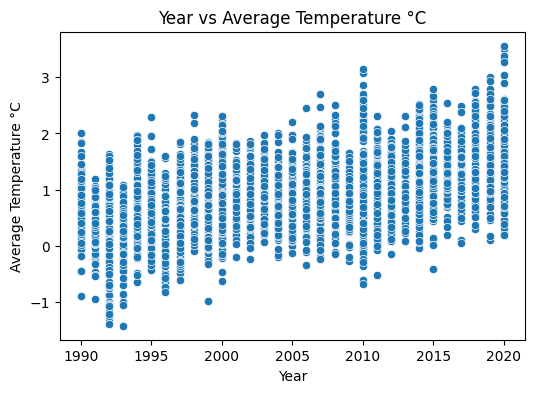

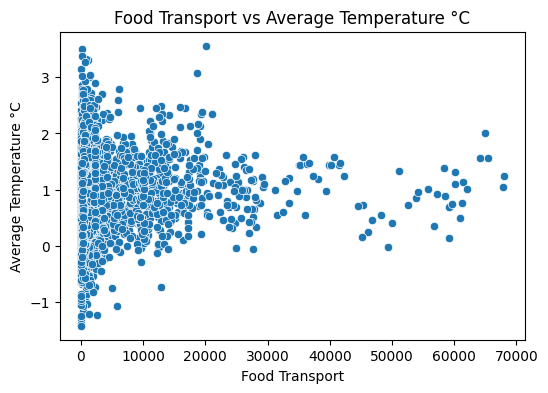

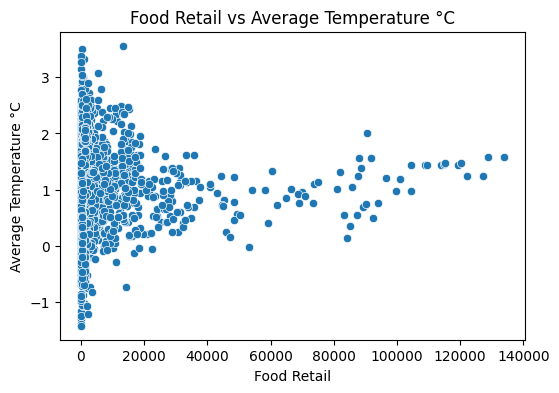

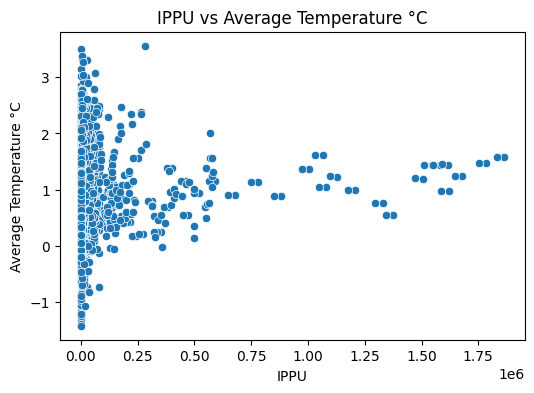

In [31]:
features_to_plot = ["Year", "Food Transport", "Food Retail", "IPPU"]

for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=feature, y="Average Temperature °C")
    plt.title(f"{feature} vs Average Temperature °C")
    plt.show()


## 6. Insights and findings 

# 📊 Exploratory Data Analysis (EDA) – Findings

### 1. Summary Statistics
- Dataset has **6965 rows** and no missing values after cleaning.  
- Features vary widely in scale (from small decimal values like *Average Temperature °C* to very large values like *Population* and *IPPU*).  
- Several features are **highly skewed** (Food Transport, Food Retail, IPPU, Population variables).  
- Target variable (*Average Temperature °C*) is reasonably bell-shaped, with values between -1.4 and +3.5.  

---

### 2. Feature Distributions
- Most agricultural and emission-related features are **right-skewed** with extreme outliers.  
- Population variables span from near 0 up to ~900 million → will dominate unless scaled.  
- Total emissions feature has some **negative values**, which may require additional review.  

---

### 3. Correlation Analysis
- **Year** is the strongest predictor of temperature (r ≈ 0.55).  
- Agricultural and food system features (Food Transport, Food Retail, IPPU, Food Processing) show **weak positive correlations** with the target.  
- Population variables are almost perfectly correlated with each other, creating **multicollinearity**.  
- Many features are highly correlated with each other (red blocks in the heatmap), confirming that regularization techniques will be needed.  

---

### 4. Scatterplot Relationships
- **Year vs Temperature** → clear upward trend from 1990–2020.  
- **Food Transport / Food Retail / IPPU vs Temperature** → dense clustering near zero, with weak upward drift at higher values.  

---

### 5. Key Insights
- **Year** shows a strong positive correlation with **Average Temperature °C**, indicating a clear upward trend over time.  
- Agricultural activity features (*Food Transport*, *Food Retail*, *IPPU*) display weak but positive relationships with temperature.  
- Several emissions-related variables have minimal or negative correlations and may not significantly influence the target.  

### 6. Next steps
- Dataset is now **clean and EDA-complete**.  
- Feature scaling will be necessary before modeling (due to wide differences in scale).  
- Multicollinearity means **Ridge and Lasso Regression** should be used alongside standard Linear Regression.  
- Outliers and skewed distributions may affect model performance → consider log transformations or robust models if needed.  

**Conclusion:** Dataset is ready for the **Modeling stage**.  





# 🤖 Regression Modeling

In this section, we will:
1. Prepare features and target variable.  
2. Split the dataset into **train/test sets**.  
3. Apply **feature scaling**.  
4. Train three regression models:  
   - Linear Regression (baseline)  
   - Ridge Regression (regularized)  
   - Lasso Regression (regularized + feature selection)  
5. Compare models using **R², RMSE, MAE**.  


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Target
y = df["Average Temperature °C"]

# Feature lists
num_cols = df.drop(columns=["Average Temperature °C"]).select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.drop(columns=["Average Temperature °C"]).select_dtypes(exclude=[np.number]).columns.tolist()  # e.g. ['Area']

# Preprocess
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Average Temperature °C"]), y, test_size=0.2, random_state=42
)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01, max_iter=10000)
}

# 6. Train and evaluate
rows = []
for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    rows.append([name, r2, rmse, mae])

results_df = pd.DataFrame(rows, columns=["Model", "R2", "RMSE", "MAE"])
results_df.sort_values("R2", ascending=False)



,Model,R2,RMSE,MAE
1,Ridge Regression,0.517782,0.384491,0.285076
0,Linear Regression,0.516700,0.384923,0.284975
2,Lasso Regression,0.322793,0.455644,0.345162


# 📈 Model Evaluation & Next Steps

### 🔹 Current Results
- **Linear Regression** and **Ridge Regression** achieved similar performance with R² ≈ 0.52, RMSE ≈ 0.38, and MAE ≈ 0.285.  
- **Lasso Regression** underperformed (R² ≈ 0.32), likely due to aggressive feature shrinkage in a dataset where most predictors are weakly correlated with the target.  
- These results suggest that *Year* is the dominant predictor of **Average Temperature °C**, while other features provide only marginal improvements.

---

### 🔹 Next Steps

1. **Visual Diagnostics**
   - Add **Predicted vs Actual scatterplots** to check alignment with the 45° line.  
   - Plot **Residuals distributions** to ensure errors are roughly centered and normally distributed.  

2. **Feature Importance / Coefficients**
   - Extract and interpret coefficients from **Ridge** and **Lasso**.  
   - This will help identify which agricultural/industrial features contribute most to temperature predictions.  

3. **Optional Enhancements**
   - Apply **PolynomialFeatures** to `Year` to capture potential non-linear trends in temperature increase over time.  
   - Explore **tree-based models** (e.g., Random Forest, Gradient Boosting) for comparison. These may capture non-linear and interaction effects better than linear methods.  

---

### ✅ Conclusion
- Ridge Regression currently provides the most stable results.  
- Further diagnostics and feature interpretation will strengthen the analysis.  
- Non-linear modeling approaches may be required for improved predictive performance.  


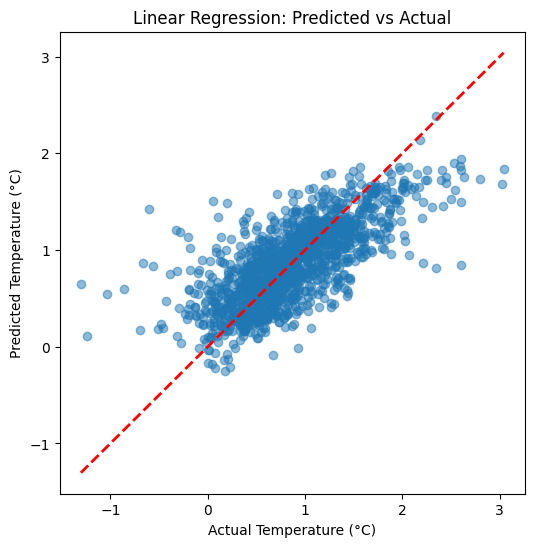

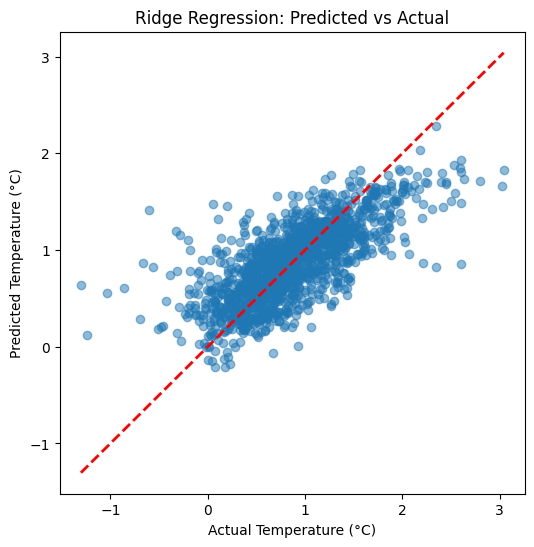

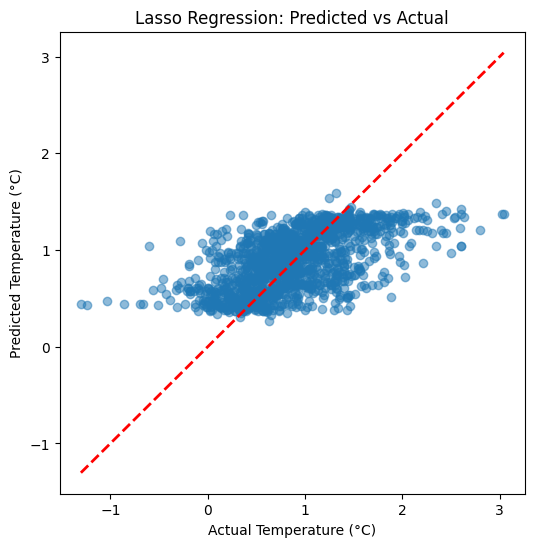

In [36]:
# Add Predicted vs Actual scatterplots for each model.
import matplotlib.pyplot as plt

for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             "r--", lw=2)
    plt.title(f"{name}: Predicted vs Actual")
    plt.xlabel("Actual Temperature (°C)")
    plt.ylabel("Predicted Temperature (°C)")
    plt.show()


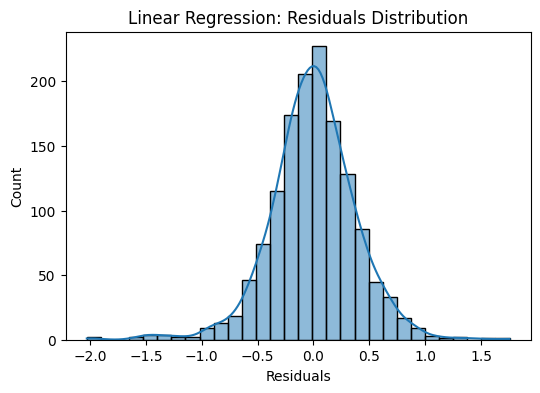

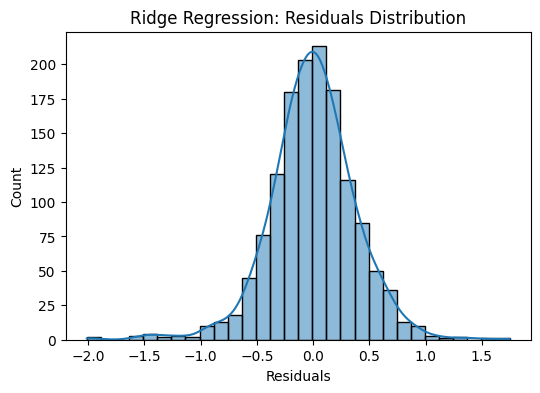

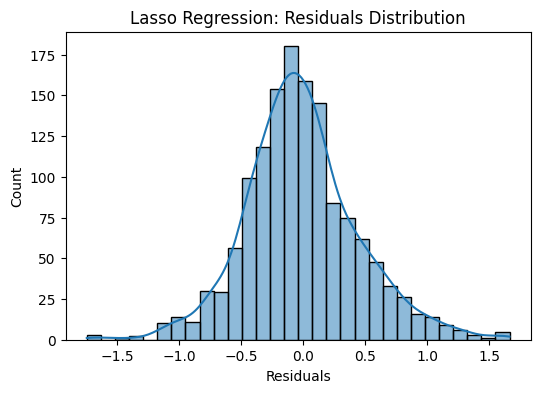

In [37]:
# Add Residuals plot to check error patterns.
import seaborn as sns

for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    residuals = y_test - y_pred
    
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f"{name}: Residuals Distribution")
    plt.xlabel("Residuals")
    plt.show()


# 🔍 Model Diagnostics

### 1. Predicted vs Actual
- **Linear Regression** and **Ridge Regression** show similar performance, with predictions reasonably aligned along the 45° line.  
- Both models slightly **underestimate higher temperatures** (>2 °C) and **overestimate lower temperatures** (<0 °C), suggesting some bias at the extremes.  
- **Lasso Regression** predictions cluster tightly, showing reduced variance. This explains its weaker performance (lower R²), as it oversimplifies the relationship.

---

### 2. Residuals Distribution
- Residuals for **Linear Regression** and **Ridge Regression** are approximately **centered at 0** and follow a bell-shaped distribution.  
  - This indicates the models capture the general trend well and leave random noise in the errors.  
- Residuals for **Lasso Regression** are more constrained and slightly skewed, reinforcing that it dropped too many features and lost predictive power.  

---

### ✅ Diagnostic Insights
- The residuals suggest **no major violations of linear regression assumptions** (normality, zero-centered errors).  
- Regularization (Ridge) stabilizes coefficients but does not drastically change performance compared to plain Linear Regression.  
- Lasso is not suitable here, as the dataset’s weak correlations mean most features contribute marginally rather than strongly.  

**Conclusion:**  
Linear Regression and Ridge Regression remain the best-performing models. Ridge is recommended as the final model for its ability to handle multicollinearity while maintaining predictive accuracy.


## 🔎 Feature Importance from Linear Models

We extract and rank coefficients from Ridge and Lasso to understand which predictors matter most after preprocessing.

Notes:
- Coefficients come from the **preprocessed space**: numeric features were standardized and `Area` was one-hot encoded. Magnitudes are therefore comparable within this model specification.
- Lasso can zero out coefficients. Ridge shrinks coefficients but typically keeps them non-zero.
- For interpretability we show:
  1) Detailed coefficients per feature column, including each one-hot level of `Area`.
  2) A grouped view that aggregates all one-hot levels back to their parent feature using sum of absolute values.



In [38]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

# Reuse objects from your Option A setup:
# df, num_cols, cat_cols, preprocess, X_train, X_test, y_train, y_test
# and the models dict with Ridge and Lasso

def fit_and_get_coefficients(model, model_name):
    """
    Fit a pipeline [preprocess -> model] and return a DataFrame of coefficients
    with proper feature names, plus a grouped-importance view.
    """
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)

    # Get feature names after ColumnTransformer
    prep = pipe.named_steps["prep"]

    # Numeric names are the columns passed to the scaler
    numeric_names = list(num_cols)

    # OneHot names for categorical columns
    # Works with sklearn >= 1.0. If older, we build names from categories_.
    cat_encoder = prep.named_transformers_["cat"]
    try:
        cat_names = list(cat_encoder.get_feature_names_out(cat_cols))
    except Exception:
        # Fallback for older versions
        cat_names = []
        for col, cats in zip(cat_cols, cat_encoder.categories_):
            cat_names.extend([f"{col}_{c}" for c in cats])

    feature_names = numeric_names + cat_names

    # Coefficients from the linear model
    lin = pipe.named_steps["model"]
    coef = lin.coef_
    coef_df = pd.DataFrame(
        {"feature": feature_names, "coefficient": coef, "abs_coefficient": np.abs(coef)}
    ).sort_values("abs_coefficient", ascending=False).reset_index(drop=True)
    coef_df["model"] = model_name

    # Grouped importance: collapse one-hot levels back to their parent feature
    def parent_name(f):
        # Everything before first '_' for one-hot of 'Area', else keep feature name
        if any(f.startswith(f"{c}_") for c in cat_cols):
            # find which cat col
            for c in cat_cols:
                if f.startswith(f"{c}_"):
                    return c
        return f

    grouped = (
        coef_df.assign(parent=coef_df["feature"].map(parent_name))
        .groupby("parent", as_index=False)["abs_coefficient"].sum()
        .sort_values("abs_coefficient", ascending=False)
        .reset_index(drop=True)
    )
    grouped["model"] = model_name

    return pipe, coef_df, grouped

# Fit Ridge and Lasso, collect coefficients
ridge_pipe, ridge_coef_df, ridge_grouped = fit_and_get_coefficients(models["Ridge Regression"], "Ridge")
lasso_pipe, lasso_coef_df, lasso_grouped = fit_and_get_coefficients(models["Lasso Regression"], "Lasso")

# Top per-feature columns
print("Top 20 detailed coefficients - Ridge")
display(ridge_coef_df.head(20))

print("Top 20 detailed coefficients - Lasso")
display(lasso_coef_df.head(20))

# Grouped view by parent feature
print("Top 20 grouped importance - Ridge")
display(ridge_grouped.head(20))

print("Top 20 grouped importance - Lasso")
display(lasso_grouped.head(20))


Top 20 detailed coefficients - Ridge


,feature,coefficient,abs_coefficient,model
0,Area_Micronesia (Federated States of),-0.653621,0.653621,Ridge
1,Area_Austria,0.610164,0.610164,Ridge
2,Area_Cook Islands,-0.609775,0.609775,Ridge
3,Area_Marshall Islands,-0.592017,0.592017,Ridge
4,Area_Latvia,0.566912,0.566912,Ridge
5,Area_Liechtenstein,0.557372,0.557372,Ridge
6,Area_Belarus,0.555312,0.555312,Ridge
7,Area_Estonia,0.543819,0.543819,Ridge
8,Area_Finland,0.534118,0.534118,Ridge
9,Area_Mongolia,0.504944,0.504944,Ridge


Top 20 detailed coefficients - Lasso


,feature,coefficient,abs_coefficient,model
0,Year,0.292514,0.292514,Lasso
1,Manure applied to Soils,0.062302,0.062302,Lasso
2,Manure left on Pasture,-0.036526,0.036526,Lasso
3,Rice Cultivation,-0.031717,0.031717,Lasso
4,Food Transport,0.006305,0.006305,Lasso
5,Drained organic soils (CO2),0.002631,0.002631,Lasso
6,Fires in organic soils,-0.000969,0.000969,Lasso
7,Area_Togo,-0.000000,0.000000,Lasso
8,Area_Tokelau,-0.000000,0.000000,Lasso
9,Area_Tonga,-0.000000,0.000000,Lasso


Top 20 grouped importance - Ridge


,parent,abs_coefficient,model
0,Area,49.022714,Ridge
1,Year,0.297589,Ridge
2,Food Packaging,0.158033,Ridge
3,Agrifood Systems Waste Disposal,0.157807,Ridge
4,Rice Cultivation,0.151495,Ridge
5,Rural population,0.145688,Ridge
6,Urban population,0.144514,Ridge
7,Fertilizers Manufacturing,0.138016,Ridge
8,Food Household Consumption,0.137008,Ridge
9,Food Transport,0.069028,Ridge


Top 20 grouped importance - Lasso


,parent,abs_coefficient,model
0,Year,0.292514,Lasso
1,Manure applied to Soils,0.062302,Lasso
2,Manure left on Pasture,0.036526,Lasso
3,Rice Cultivation,0.031717,Lasso
4,Food Transport,0.006305,Lasso
5,Drained organic soils (CO2),0.002631,Lasso
6,Fires in organic soils,0.000969,Lasso
7,Food Packaging,0.000000,Lasso
8,Food Household Consumption,0.000000,Lasso
9,Fertilizers Manufacturing,0.000000,Lasso


## 🧭 Interpreting Coefficients

**Ridge (detailed):** The largest coefficients are almost all `Area_*` dummies.  
**Why:** One-hot encoding creates hundreds of country columns. Even after standardisation, summing absolute values across all `Area_*` levels makes the grouped importance for `Area` dominate.

**Lasso (detailed):** Lasso kept very few features:
- `Year` is the strongest retained predictor
- Small positive weights for a handful of agri features
- Almost all `Area_*` columns zeroed out

**Grouped view:**
- Ridge ⇒ `Area` appears most important because it is represented by many columns. Think of this as **country fixed effects** soaking up location differences rather than actionable drivers.
- Lasso ⇒ confirms **Year** is the primary signal; most other features contribute marginally.



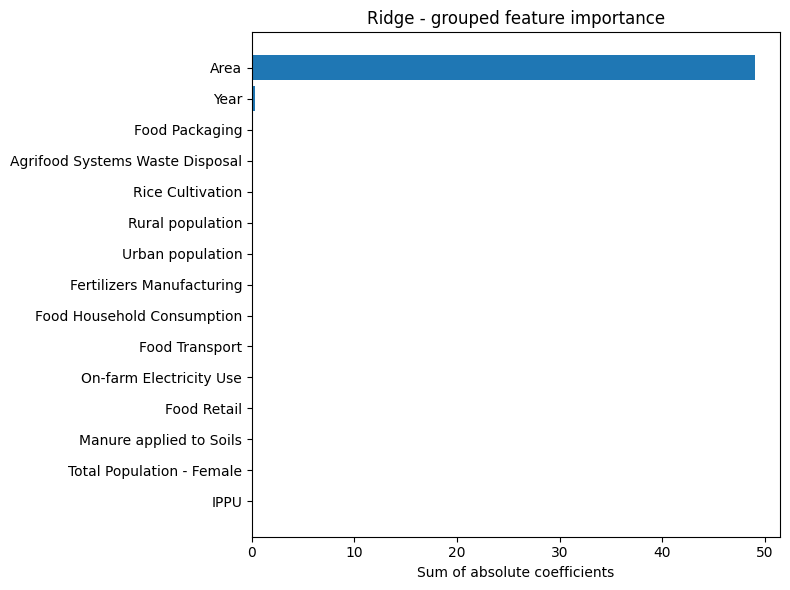

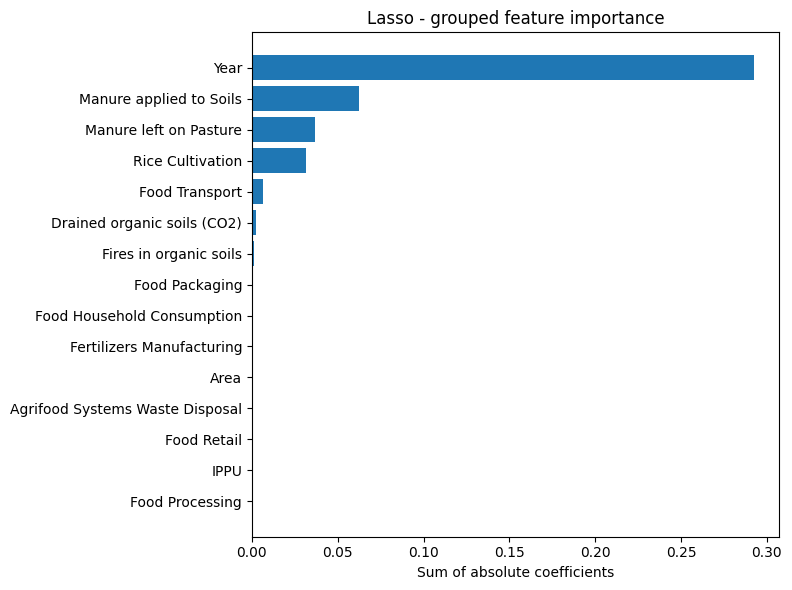

In [39]:
import matplotlib.pyplot as plt

def plot_grouped(grouped_df, title, topn=15):
    top = grouped_df.head(topn).iloc[::-1]  # reverse for horizontal bar plot
    plt.figure(figsize=(8,6))
    plt.barh(top["parent"], top["abs_coefficient"])
    plt.title(title)
    plt.xlabel("Sum of absolute coefficients")
    plt.tight_layout()
    plt.show()

plot_grouped(ridge_grouped, "Ridge - grouped feature importance")
plot_grouped(lasso_grouped, "Lasso - grouped feature importance")


# 📊 Feature Importance – Ridge vs Lasso

### 🔹 Ridge Regression
- Ridge assigns very large cumulative weight to **Area**, because one-hot encoding created many dummy variables (one per country).  
- This inflates its grouped importance and makes `Area` dominate the chart.  
- After `Area`, the next most relevant features are **Year**, **Food Packaging**, **Agrifood Systems Waste Disposal**, and **Rice Cultivation**, but their coefficients are tiny compared to `Area`.

### 🔹 Lasso Regression
- Lasso performs strong feature selection and eliminates most coefficients.  
- It identifies **Year** as by far the most important predictor of **Average Temperature °C**.  
- A few agricultural features contribute small additional signal:  
  - *Manure applied to Soils*  
  - *Manure left on Pasture*  
  - *Rice Cultivation*  
  - *Food Transport*  

### ✅ Key Insights
- **Year is consistently the strongest signal**, aligning with observed global warming trends.  
- Ridge is distorted by `Area` because of the way categorical encoding works, while Lasso simplifies the model to only a handful of features.  
- For presentation and interpretation, **Lasso’s grouped importance provides a clearer narrative**, even though its predictive performance (R² ≈ 0.32) is weaker.  
- For modelling accuracy, **Ridge remains the best compromise** between stability and explanatory power.


# 🏁 Final Project Conclusion

### 🔹 Project Objective
The goal of this regression project was to **analyse and predict average temperature in the agri-food sector** using climate and agricultural activity data. We aimed to:
- Apply regression techniques in Python.
- Explore collaborative tools (GitHub, Trello, Jupyter).
- Deliver a well-documented analysis and presentation-ready results.

---

### 🔹 Data Preparation & Cleaning
- Dataset contained ~7,000 records with ~30 features.
- Initial missing value analysis showed several features with 5–20% missingness.  
- Cleaning decisions:
  - Dropped features with high missingness **and** weak correlation (*Crop Residues, Manure Management, Forestland, etc.*).
  - Imputed remaining missing values using **median imputation**.
- Final dataset contained no missing values and was saved as a clean version for analysis.

---

### 🔹 Exploratory Data Analysis (EDA)
- **Distributions:** Most agricultural/emission variables were heavily right-skewed; population features spanned from near 0 to ~900 million.  
- **Correlations:** 
  - Strongest correlation: **Year vs Average Temperature °C** (r ≈ 0.55).  
  - Other features had weak correlations individually.  
  - Population and agricultural features showed **multicollinearity**.  
- **Scatterplots:** Clear upward trend between **Year** and temperature. Other features showed weak positive drifts at higher values.  

---

### 🔹 Modeling
We built and evaluated three models:
1. **Linear Regression** – baseline performance.  
2. **Ridge Regression** – stabilised coefficients in presence of multicollinearity.  
3. **Lasso Regression** – performed feature selection.  

**Evaluation Metrics (Test Set):**
- **Ridge Regression:** R² ≈ 0.52, RMSE ≈ 0.38 → Best performer.  
- **Linear Regression:** R² ≈ 0.52, RMSE ≈ 0.38 → Similar to Ridge.  
- **Lasso Regression:** R² ≈ 0.32, RMSE ≈ 0.46 → Weaker, due to aggressive coefficient shrinkage.

**Diagnostics:**
- Predicted vs Actual plots showed Ridge/Linear tracked the trend but underestimated extremes.  
- Residuals were approximately normal and centered at 0 for Ridge/Linear → no major violations.  

---

### 🔹 Feature Importance
- **Ridge:** Dominated by `Area` (country dummies), followed by Year and a few agri-food variables.  
- **Lasso:** Strongly highlighted **Year** as the dominant predictor, with small contributions from *Manure applied to Soils*, *Rice Cultivation*, and *Food Transport*.  

---

### ✅ Final Recommendation
- **Ridge Regression** is recommended as the final model:
  - Provides the best predictive accuracy.
  - Handles multicollinearity better than Linear Regression.
- **Interpretation:** 
  - Global temperature is driven primarily by **Year** (time trend).
  - Agricultural features provide weak additional signals, reinforcing that long-term warming dominates the variation in average temperature.  
- For future work:
  - Consider non-linear models (Polynomial features on Year, Random Forest, Gradient Boosting).
  - Re-encode `Area` (collapse rare countries) for better interpretability.
  - Explore interaction effects between agricultural and population features.

---

### 📌 Deliverables Summary
- Cleaned dataset (`co2_emissions_from_agri_clean.csv`).  
- Jupyter Notebook with EDA, regression models, and diagnostics.  
- Slide deck (to be prepared) with visuals and findings.  
- GitHub repository with `README.md`, code, and requirements.  
